In [112]:
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import sys
%matplotlib inline

In [113]:
def linearModel(data):
    """
    线性回归统计性质分析步骤
    
    参数
    ----
    data: DataFrame,建模数据
    """
    labels = ['y']
    features = ['x']
    Y = data[labels]
    # 加入常量变量
    X = sm.add_constant(data[features])
    # 构建模型
    results = trainModel(X,Y)
    # 分析模型效果
    modelSummary(results)
    # 由summary分析可知，常量变量并不显著，所以去掉这个常量变量
    resultsNew = trainModel(data[features],Y)
    # 输出新模型的分析结果
    print(resultsNew.summary())
    print(results.predict())
    visualizeModel(resultsNew,data,features,labels)
    

In [114]:
def trainModel(X,Y):
    """训练模型"""
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [115]:
def modelSummary(results):
    """
    分析线性回归模型的统计性质
    """
    # 整体统计分析结果
    print(results.summary())
    
    # 用f test做假设检验
    # 用f test检验x对应的系数a是否显著
    print("检验假设x的系数等于0：")
    print(results.f_test("x=0"))
    # 用f test检验常量b是否显著
    print("检测假设const的系数等于0：")
    print(results.f_test("const=0"))
    # 用f test检验a=1,b=0同时成立时的显著性
    print("检验假设x的系数等于1，const系数等于0:")
    print(results.f_test(["x=1","const=0"]))
    

In [116]:
def readData(path):
    data = pd.read_csv(path)
    return data 

In [117]:
def visualizeModel(re, data, features, labels):
    """
    模型可视化
    """
    # 计算预测结果的标准差，预测下界，预测上界
    prstd, preLow, preUp = wls_prediction_std(re, alpha=0.05)
    # 为在Matplotlib中显示中文，设置特殊字体
    plt.rcParams['font.sans-serif']=['SimHei']
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里只画一幅图
    ax = fig.add_subplot(111)
    # 在Matplotlib中显示中文，需要使用unicode
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.set_title(u'%s' % "线性回归统计分析示例")
    else:
        ax.set_title(u'%s' % "线性回归统计分析示例".decode("utf-8"))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    # 画点图，用蓝色圆点表示原始数据
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.scatter(data[features], data[labels], color='b',
            label=u'%s: $y = x + \epsilon$' % "真实值")
    else:
        ax.scatter(data[features], data[labels], color='b',
            label=u'%s: $y = x + \epsilon$' % "真实值".decode("utf-8"))
    # 画线图，用红色虚线表示95%置信区间
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.plot(data[features], preUp, "r--", label=u'%s' % "95%置信区间")
        ax.plot(data[features], re.predict(), color='r',
            label=u'%s: $y = %.3fx$'\
            % ("预测值", re.params[features]))
    else:
        ax.plot(data[features], preUp, "r--", label=u'%s' % "95%置信区间".decode("utf-8"))
        ax.plot(data[features], re.predict(), color='r',
            label=u'%s: $y = %.3fx$'\
            % ("预测值".decode("utf-8"), re.params[features]))
    ax.plot(data[features], preLow, "r--")
    legend = plt.legend(shadow=True)
    legend.get_frame().set_facecolor('#6F93AE')
    plt.show()

/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/p

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     460.5
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           2.85e-14
Time:                        16:04:49   Log-Likelihood:                -31.374
No. Observations:                  20   AIC:                             66.75
Df Residuals:                      18   BIC:                             68.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.934     -1.017      0.3

/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site

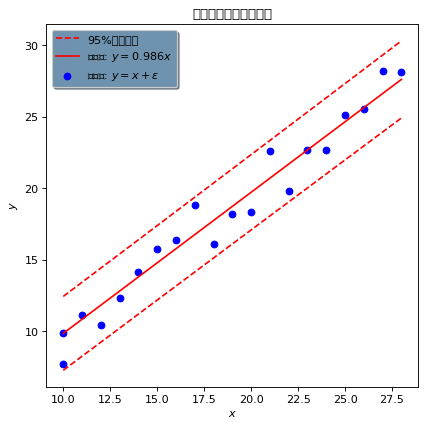

In [118]:
if __name__ == '__main__':
    data = readData('simple_example.csv')
    linearModel(data)

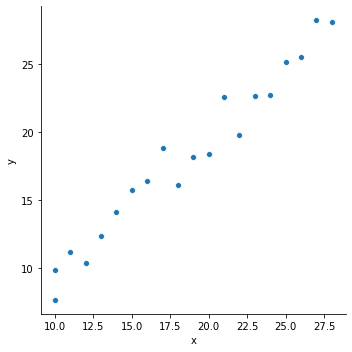

In [119]:
data = readData('simple_example.csv')
sns.relplot(x="x", y="y", data=data)
